# Fibonacci Numbers and the Golden Ratio

This is a brief introduction to the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio), presented through it's relation to the [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number). A common introduction to the golden ratio can be through its presence in [art](https://www.goldennumber.net/art-composition-design/), but I feel that this typically hides the more mathematically interesting properties of the golden ratio, some similar numbers (e.g the [silver ratio](https://en.wikipedia.org/wiki/Silver_ratio)), and areas of mathematics connected with its discovery. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy as sp
import scipy.linalg
from numpy import *

Let's first define this Fibonacci numbers using a recurrence relation as such: 
$$
\begin{align}
 & F_0=1 \\
 & F_1=1 \\
 \forall n\geq2 \;\; & F_n=F_{n-1}+F_{n-2} 
 \end{align} 
 $$

We may write a function in python to generate the first $n$ Fibonacci numbers for $n\geq2$ ($n\in\mathbb{N}$ naturally).

In [3]:
def Fibonacci(n):
    F=np.zeros(n)
    F[0:2]=np.array([1,1])
    for i in range(2,n):
        F[i]=F[i-1]+F[i-2]
    return(F)

We can now try this out. Notes I have chosen my convention of starting with $F_0=1$ in order to have $\texttt{F[i]}=F_i$ in my array, and to avoid any issues with dividing by zero when considering the ratio. 

In [4]:
F=Fibonacci(11)
print(F)

[ 1.  1.  2.  3.  5.  8. 13. 21. 34. 55. 89.]


If we want to know something about how fast this series is increasing, we can look at the ratios between successive terms, $R_n=\frac{F_{n+1}}{F_n}$. 

In [5]:
R=F[1::]/F[:-1]
print(np.round(R,decimals=4))

[1.     2.     1.5    1.6667 1.6    1.625  1.6154 1.619  1.6176 1.6182]


These seem to be tending to some limit, so we can investigate further by looking at the ratios of the next few Fibonacci numbers

In [6]:
F=Fibonacci(21)
R=F[1::]/F[:-1]
print(np.round(R[10::],decimals=8))

[1.61797753 1.61805556 1.61802575 1.61803714 1.61803279 1.61803445
 1.61803381 1.61803406 1.61803396 1.618034  ]


We may also investigate this ratio by noting
$$
R_{n+1}=\frac{F_{n+2}}{F_{n+1}}=\frac{F_{n+1}+F_{n}}{F_{n+1}}=1+\frac{1}{R_n}
\\
$$
This mean we can write the relation as $R_{n+1}=f(R_n)$, for the function $f(x)=1+\frac{1}{x}$. With this formulation we can produce a [cobweb plot](https://en.wikipedia.org/wiki/Cobweb_plot).

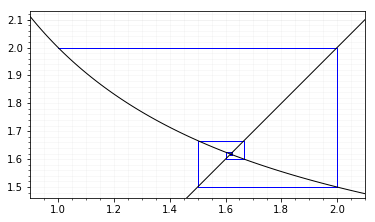

In [15]:
def f(x): return(1+1/x)

xmin=0.9
xmax=2.1
x=linspace(xmin,xmax,100)
y=f(x)

n=20
X=np.zeros(n+1)
Y=np.zeros(n+1)
X[0]=1
for i in range(0,n):
    X[i+1]=f(X[i])
for i in range(0,n-1):
    plt.plot([X[i],X[i+1]],[X[i+1],X[i+1]],'b',lw=1)
    plt.plot([X[i+1],X[i+1]],[X[i+1],X[i+2]],'b',lw=1)
plt.plot(x,y,'k',lw=1)
plt.plot([xmin,xmax],[xmin,xmax],'k',lw=1)

ax = plt.gca()
ax.set_aspect(1)
ax.set_ylim(0.99*f(xmax),1.01*f(xmin))
ax.minorticks_on()
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.1)
ax.set_xlim(xmin,xmax);

We can see from the plot that the ratio is getting closer and closer to a value $R^{\ast}$ which is a fixed point of $f$, i.e. $f(R^{\ast})=R^{\ast}$. We can understand the stability of this fixed point by [Taylor expanding](https://en.wikipedia.org/wiki/Taylor_series) $f(R)$ about $R^{\ast}$
$$
\begin{align}
 f(R)&=f(R^{\ast})+f^{'}(R^{\ast})\left(R-R^{\ast}\right)+O\left(\left(R-R^{\ast}\right)^2\right) \\
\Rightarrow \;\; \lvert R_{n+1}-R^{\ast}\rvert&=\lvert f^{'}(R^{\ast})\rvert \lvert R_{n}-R^{\ast}\rvert \;\; \text{to lowest order}
\end{align}
$$
Hence the fixed point is attractive if $\lvert f^{'}(R^{\ast})\rvert < 1 \; \Leftrightarrow R^{\ast}>1 $

The fixed points of $f(x)$ are the solutions of $x=1+\frac{1}{x} \, \Rightarrow \, x^2-x-1=0 \, \Rightarrow \, x=\frac{1\pm\sqrt{5}}{2}$, so we expect that our ratio is tending to $\frac{1+\sqrt{5}}{2}$, as this is the positive root. Let's prove it.

The defining equation for the Fibonacci sequence is a [linear difference equation](https://en.wikipedia.org/wiki/Linear_difference_equation), and can be solved nicely by looking for solutions that are linear combinations of $\lambda^n$. Using this ansatz we find 
$$
\begin{align}
\lambda^{n+2} &= \lambda^{n+1}+\lambda^{n} \\
\Rightarrow \, 0 &= \lambda^2-\lambda-1 
\end{align}
$$

This is the same quadratic as we solved to find the fixed points of our recurrence relation for the ratio, and this is no coincidence. So we know the general solution to our difference equation is $F_n=A\left(\frac{1+\sqrt{5}}{2}\right)^n+B\left(\frac{1-\sqrt{5}}{2}\right)^n$. Imposing the conditions that $F_0=1$ and $F_1=1$ gives 
$$
\begin{align}
A+B &= 1 \\
A\left(\frac{1+\sqrt{5}}{2}\right)+B\left(\frac{1-\sqrt{5}}{2}\right) &= 1 
\end{align}
$$

so our final solution is 
$$
F_n=\frac{1}{\sqrt{5}}\left[\left(\frac{1+\sqrt{5}}{2}\right)^{n+1}-\left(\frac{1-\sqrt{5}}{2}\right)^{n+1}\right]
$$

Now, recognising that $\lvert\frac{1-\sqrt{5}}{2}\rvert<1$, we can see that the contribution to $F_n$ from the second term will become negligible, and the ratio $R_n \to \frac{1+\sqrt{5}}{2}$. This ratio is the golden ratio. 

We can extend this analysis to a more general type of Fibonacci sequence defined by 
$$
F_{n+m}=\sum_{k=0}^{m-1} a_k F_{n+k}
$$
for $n\geq0$ for some $m\in\mathbb{N}$, $a_k \in \mathbb{N}_{0}$, giving $F_0, F_1, \dots, F_{m-1}$ as initial values. In this case the solutions will be given in terms of the roots of the polynomial 
$$
\lambda^{m}-\sum_{k=0}^{m-1} a_k \lambda^k=0
$$

In this case, the corresponding 'Golden ratio' will be the the root with the largest modulus, which we know must be real and positive. 

In the case that $F_{n+2}=2F_{n+1}+F_{n}$, we get what is known as the [silver ratio](https://en.wikipedia.org/wiki/Silver_ratio), and has the value $\frac{2+\sqrt{8}}{2}=1+\sqrt{2}$. 

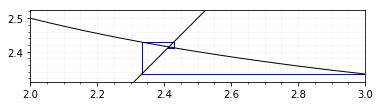

In [13]:
def g(x): return(2+1/x)

xmin=2.0
xmax=3.0
x=linspace(xmin,xmax,100)
y=g(x)

n=20
X=np.zeros(n+1)
Y=np.zeros(n+1)
X[0]=1
for i in range(0,n):
    X[i+1]=g(X[i])
for i in range(0,n-1):
    plt.plot([X[i],X[i+1]],[X[i+1],X[i+1]],'b',lw=1)
    plt.plot([X[i+1],X[i+1]],[X[i+1],X[i+2]],'b',lw=1)
plt.plot(x,y,'k',lw=1)
plt.plot([xmin,xmax],[xmin,xmax],'k',lw=1)

ax = plt.gca()
ax.set_aspect(1)
ax.set_ylim(0.99*g(xmax),1.01*g(xmin))
ax.minorticks_on()
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.1)
ax.set_xlim(xmin,xmax);